# Question 3 Report: Analysis by Linear Regression and Alternative Methods for the Estimation of Continuous Target Variable 

## 1. Installation of the Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.style.use('ggplot')
%matplotlib inline

## 2. Loading of the Data Set and Initial Examination

In [6]:
file_path = "insurance.csv"  # Veri seti dosyasının konumu
insurance_data = pd.read_csv(file_path)

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. General Information of the Data Set and Incomplete Value Control

In [9]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
missing_values = insurance_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 4. Data Analysis and Visualization

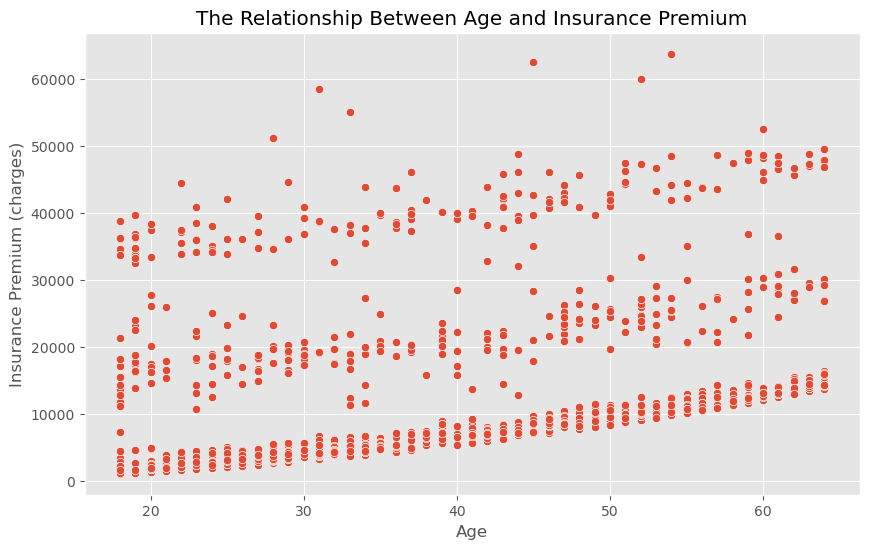

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance_data)
plt.title('The Relationship Between Age and Insurance Premium')
plt.xlabel('Age')
plt.ylabel('Insurance Premium (charges)')
plt.show()

### 4.2. The Relationship between Smoking and Insurance Premiums

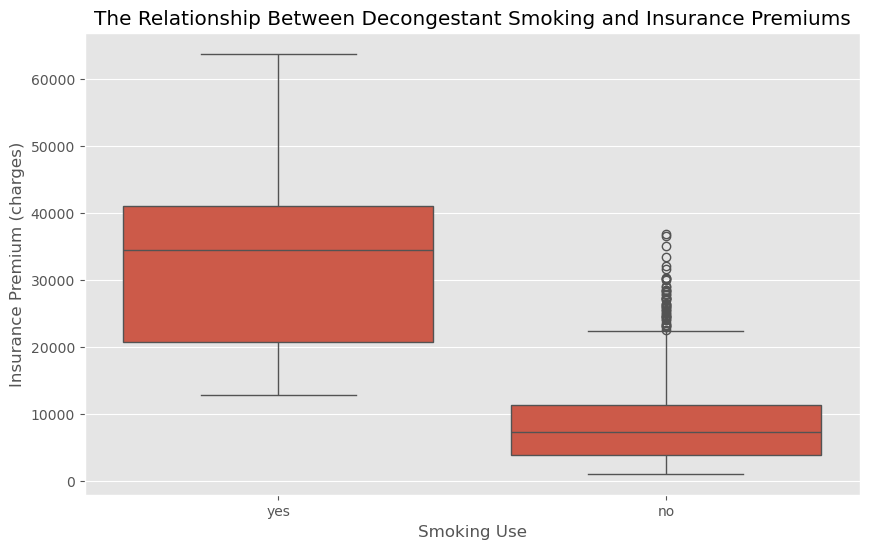

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_data)
plt.title('The Relationship Between Decongestant Smoking and Insurance Premiums')
plt.xlabel('Smoking Use')
plt.ylabel('Insurance Premium (charges)')
plt.show()

## 5. Data Preprocessing: Digitization of Categorical Variables

In [20]:
insurance_data = pd.get_dummies(insurance_data, drop_first=True)

insurance_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## 6. Dividing the Data into Training and Test Sets

In [23]:
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Scaling of Features

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8. Linear Regression Model Training and Evaluation

In [29]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Square Error (MSE): {mse:.2f}")
print(f"Average Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Linear Regression Model Performance:
Mean Square Error (MSE): 33596915.85
Average Absolute Error (MAE): 4181.19
R2 Score: 0.78


## 9. Ridge Regression Model Training and Hyperparameter Optimization

### 9.1. Training of the Ridge Model and Hyperparameter Search

In [32]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid_search.fit(X_train_scaled, y_train)

best_ridge_model = ridge_grid_search.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)

mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
mae_best_ridge = mean_absolute_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print("Best Ridge Regression Model Performance:")
print(f"Mean Square Error (MSE): {mse_best_ridge:.2f}")
print(f"Average Absolute Error (MAE): {mae_best_ridge:.2f}")
print(f"R2 Score: {r2_best_ridge:.2f}")
print(f"The Best Alpha Value: {ridge_grid_search.best_params_['alpha']}")

Best Ridge Regression Model Performance:
Mean Square Error (MSE): 33685862.86
Average Absolute Error (MAE): 4197.66
R2 Score: 0.78
The Best Alpha Value: 10


### 9.2. Ridge Model Performance Graphs

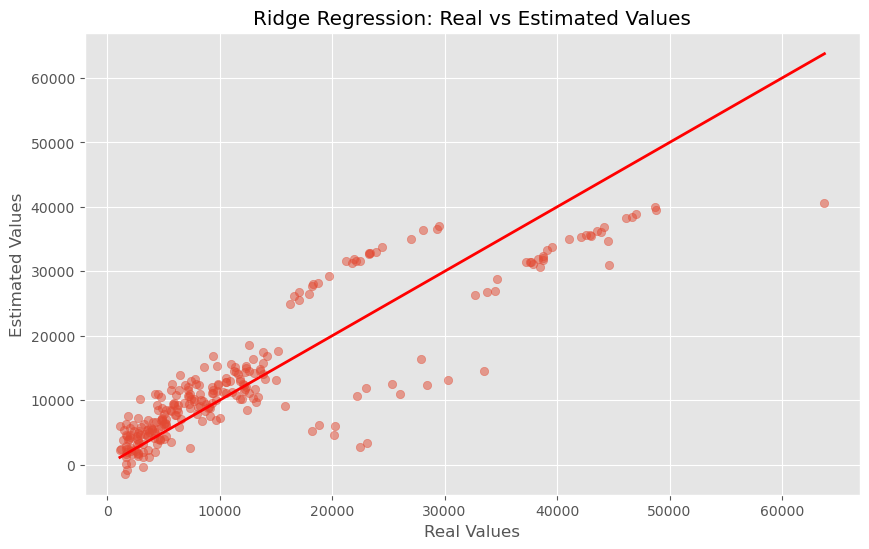

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Real Values')
plt.ylabel('Estimated Values')
plt.title('Ridge Regression: Real vs Estimated Values')
plt.show()

## 10. Lasso Regression Model Training and Hyperparameter Optimization

### 10.1. Training of the Lasso Model and Hyperparameter Search

In [38]:
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_grid_search = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid_search.fit(X_train_scaled, y_train)

best_lasso_model = lasso_grid_search.best_estimator_
y_pred_best_lasso = best_lasso_model.predict(X_test_scaled)

mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
mae_best_lasso = mean_absolute_error(y_test, y_pred_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)

print("Best Lasso Regression Model Performance:")
print(f"Mean Square Error (MSE): {mse_best_lasso:.2f}")
print(f"Average Absolute Error (MAE): {mae_best_lasso:.2f}")
print(f"R2 Score: {r2_best_lasso:.2f}")
print(f"The Best Alpha Value: {lasso_grid_search.best_params_['alpha']}")

Best Lasso Regression Model Performance:
Mean Square Error (MSE): 33639307.76
Average Absolute Error (MAE): 4184.40
R2 Score: 0.78
The Best Alpha Value: 10


### 10.2. Lasso Model Performance Graphics

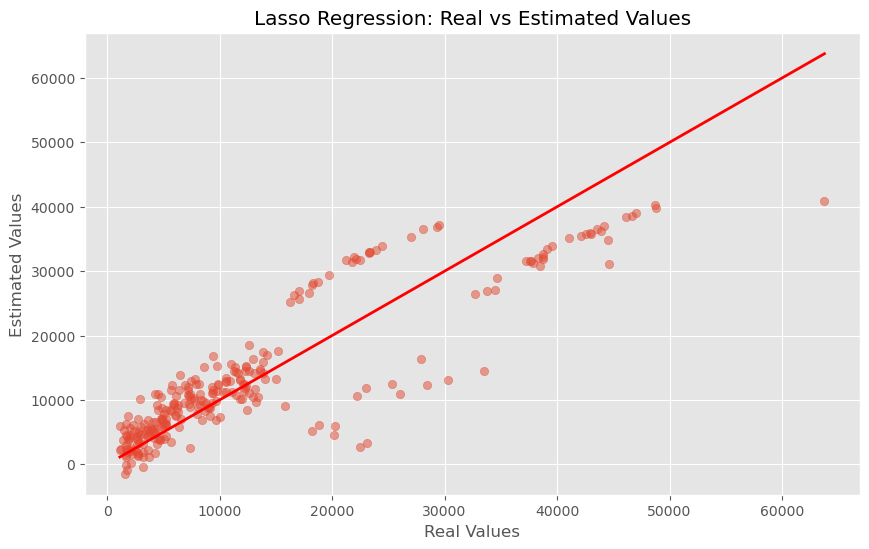

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Real Values')
plt.ylabel('Estimated Values')
plt.title('Lasso Regression: Real vs Estimated Values')
plt.show()

## 11. Comparison of Model Performances

### 11.1. Performance Comparison Table

In [44]:
performance_data = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MSE": [mse, mse_best_ridge, mse_best_lasso],
    "MAE": [mae, mae_best_ridge, mae_best_lasso],
    "R2 Score": [r2, r2_best_ridge, r2_best_lasso]
}

performance_df = pd.DataFrame(performance_data)

print("\nModel Performance Comparison:")
display(performance_df)


Model Performance Comparison:


,Model,MSE,MAE,R2 Score
0,Linear Regression,3.359692e+07,4181.194474,0.783593
1,Ridge Regression,3.368586e+07,4197.657143,0.783020
2,Lasso Regression,3.363931e+07,4184.404705,0.783320


### 11.2. Performance Graphics

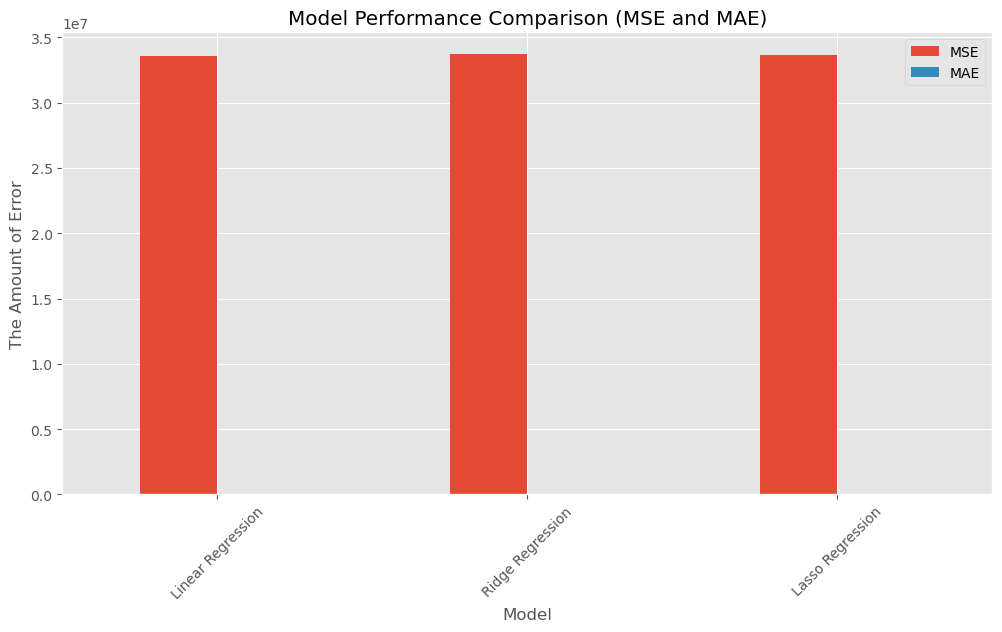

In [47]:
performance_df.set_index("Model")[["MSE", "MAE"]].plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison (MSE and MAE)")
plt.ylabel("The Amount of Error")
plt.xticks(rotation=45)
plt.show()

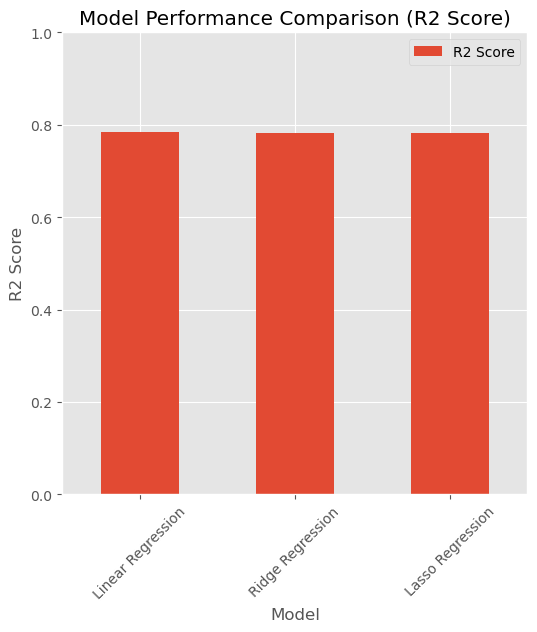

In [49]:
performance_df.set_index("Model")[["R2 Score"]].plot(kind="bar", figsize=(6, 6))
plt.title("Model Performance Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()